Test VAE model on random frame of random file in `record`

In [2]:
import numpy as np
import os
import json
import tensorflow as tf
import random
from vae.vae import ConvVAE, reset_graph

/anaconda3/envs/python35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [3]:
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, edgeitems=6, linewidth=100, suppress=True)

In [4]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1" # disable GPU

DATA_DIR = "./record/prey_predator_ma/prey"
model_path_name = "./tf_vae/"

z_size=32

In [5]:
filelist = os.listdir(DATA_DIR)

In [250]:
# from PIL import Image
# img_list = []
# for i in filelist[:20]:
#     filename = filelist[0]
#     img = Image.open(os.path.join(DATA_DIR, filename))
#     img = img.resize((64,64),Image.ANTIALIAS)
#     img = np.array(img).astype(np.float32)/255.0
#     img_list.append(img)

In [6]:
obs = np.load(os.path.join(DATA_DIR, random.choice(filelist)))["obs"]
obs = obs.astype(np.float32)/255.0

In [7]:
obs.shape

(5000, 64, 64, 3)

In [253]:
vae = ConvVAE(z_size=z_size,
              batch_size=1,
              is_training=False,
              reuse=False,
              gpu_mode=False)

vae.load_json(os.path.join(model_path_name, 'vae_pp.json'))

INFO:tensorflow:Model using cpu.


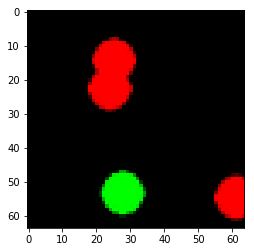

In [13]:
# show recorded frame that will be fed into the input of VAE
plt.imshow(obs[4000])
plt.show()

In [255]:
batch_z = vae.encode(obs)
print(batch_z[0]) # print out sampled z
reconstruct = vae.decode(batch_z)

[-1.3409  1.4831  1.9936  1.7468  2.1531 -2.3532  0.4701  2.5851 -1.116   0.8228 -2.2628  1.1544
  2.7217  1.7698  2.0634 -2.4725 -1.5535 -2.4846 -1.6197 -2.6077  1.6707 -1.3703  0.1023  1.5828
  4.1834  2.555   1.405   1.5214 -2.4013  1.1376  1.2587 -2.2612]


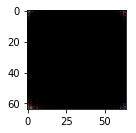

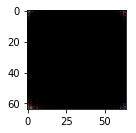

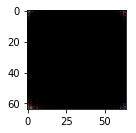

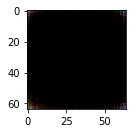

In [257]:
# show reconstruction
plt.subplot(221)
plt.imshow(reconstruct[20])
plt.show()

plt.subplot(222)
plt.imshow(reconstruct[200])
plt.show()

plt.subplot(223)
plt.imshow(reconstruct[40])
plt.show()

plt.subplot(224)
plt.imshow(reconstruct[19])
plt.show()

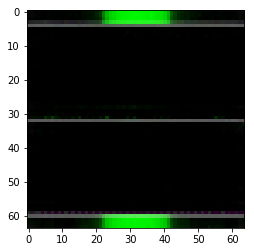

In [245]:
plt.imshow(reconstruct[0])
plt.savefig('pong_dream.pdf', format='pdf',bbox_inches='tight')